# Kalman Filter Example: Measureing/Tracking Position Velocity

<IPython.core.display.Javascript object>


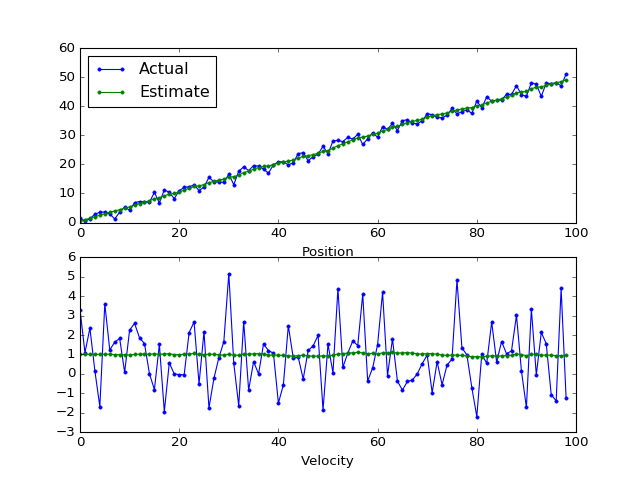

In [7]:
%matplotlib notebook
import kalmanex as kmf
import scipy as sp
from scipy import random
import matplotlib.pyplot as plt

# Generate Test Data
test_data = sp.arange(0, 50, .5)
test_data_d = sp.diff(test_data)/.5
test_data_d = sp.concatenate([[test_data_d[0] - (test_data_d[1]-test_data_d[0])], test_data_d])
data = sp.concatenate([test_data.reshape(-1, 1), test_data_d.reshape(-1, 1)], axis=1).T
meas_noise = random.normal(0, 1.5, [2, 100])
data_noise = data + meas_noise

# Initialize Filter
Q = sp.array([[.001, 0],[0, .001]]) # Process Noise
mykf = kmf.KalmanFilter(Q=Q)
mykf.set_R(sp.cov(meas_noise)) # Measurement Noise

# Initialize state estimate
mykf.x_mu = data[:,0].reshape(-1, 1)
mykf.P = Q.copy()

# Process data
x = []

for idx in range(1,data.shape[1]):
    z_new = data_noise[:, idx].reshape(-1, 1)
    mykf.predict()
    mykf.update(z_new)
    x.append(mykf.x_mu)

# Results
plt.figure()
plt.subplot(211)
plt.plot(data_noise[0,1:], '.-'); plt.plot([v[0] for v in x],'.-')
plt.xlabel('Position')
plt.legend(['Actual', 'Estimate'], loc=0)
plt.subplot(212)
plt.plot(data_noise[1,1:], '.-'); plt.plot([v[1] for v in x],'.-')
plt.xlabel('Velocity')
plt.show()

# Kalman Filter Example: Estimating Acceleration for Position/Velocity

<IPython.core.display.Javascript object>


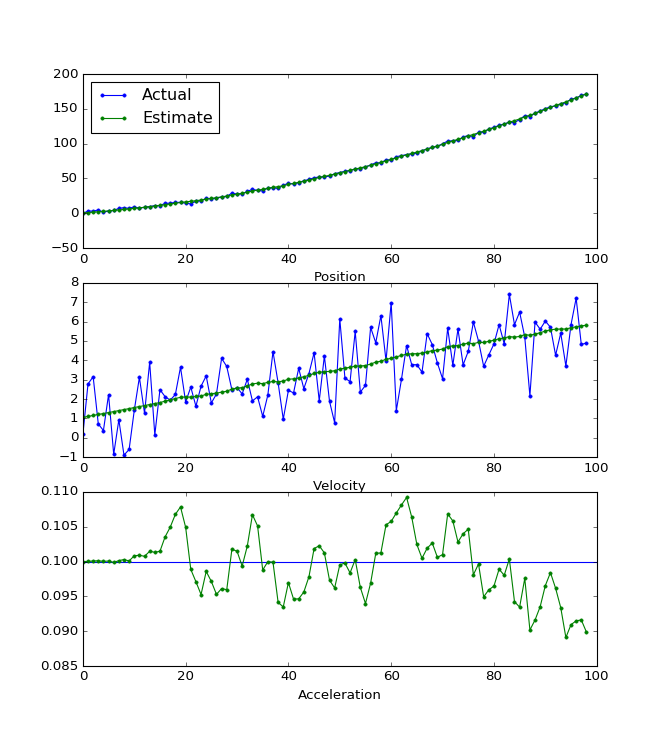

In [8]:
%matplotlib notebook
import kalmanex as kmf
import scipy as sp
from scipy import random
import matplotlib.pyplot as plt

# Generate Test Data
acc_c = .1 # Acceleration constant
test_data_a = sp.arange(0, 50, .5)
test_data_a += sp.power(test_data_a, 2)*acc_c*.5
test_data_a_d = sp.diff(test_data_a)/.5
test_data_a_d = sp.concatenate([[test_data_a_d[0] - (test_data_a_d[1]-test_data_a_d[0])], test_data_a_d])
data_a = sp.concatenate([test_data_a.reshape(-1, 1), test_data_a_d.reshape(-1, 1)], axis=1).T
meas_noise_a = random.normal(0, 1.5, [2, 100])
data_a_noise = data_a + meas_noise_a

A = sp.array([[1, .5, .125],[0,1, .5], [0, 0,1]]) # Transition Matrix
H = sp.array([[1, 0, 0], [0, 1, 0]])              # Extraction Matrix
Q = sp.array([[.001, 0, 0],[0,.0001, 0], [0, 0,.00001]]) # Process Noise
mykf = kmf.KalmanFilter(Q=Q, H=H, A=A)
mykf.set_R(sp.cov(meas_noise_a))  # Measurement Noise

# Initialize state estimate
mykf.x_mu = sp.array([data[0,0], data[1,0], acc_c]).reshape(-1,1)
mykf.P = Q.copy()

# Process Data
x_a = []
for idx in range(1,data.shape[1]):
    z_new = data_a_noise[:, idx].reshape(-1, 1)
    mykf.predict()
    mykf.update(z_new)
    x_a.append(mykf.x_mu)

# Results
plt.figure()
plt.subplot(311)
plt.plot(data_a_noise[0,1:], '.-'); plt.plot([v[0] for v in x_a],'.-')
plt.legend(['Actual', 'Estimate'], loc=0)
plt.xlabel('Position')
plt.subplot(312)
plt.plot(data_a_noise[1,1:], '.-'); plt.plot([v[1] for v in x_a],'.-')
plt.xlabel('Velocity')
plt.subplot(313)
plt.axhline(acc_c, 0, 50); plt.plot([v[2] for v in x_a],'g.-')
plt.xlabel('Acceleration')
plt.show()